In [78]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [80]:
#import data

data = pd.read_csv("D:/Elevate labs internship/AI_ML/Task 2.csv")
print(data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN     

In [82]:
data.shape

(367, 12)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [86]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [88]:
data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [90]:
data.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

In [92]:
# data imputation for categorical variables using mode

mode_value_numeric = data['Gender'].mode()[0]
data['Gender'] = data['Gender'].fillna(mode_value_numeric)
mode_value_numeric1 = data['Dependents'].mode()[0]
data['Dependents'] = data['Dependents'].fillna(mode_value_numeric1)
mode_value_numeric2 = data['Self_Employed'].mode()[0]
data['Self_Employed'] = data['Self_Employed'].fillna(mode_value_numeric2)
mode_value_numeric3 = data['Credit_History'].mode()[0]
data['Credit_History'] = data['Credit_History'].fillna(mode_value_numeric3)

In [94]:
# data imputation for continuous variables using mean

data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

In [96]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [99]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


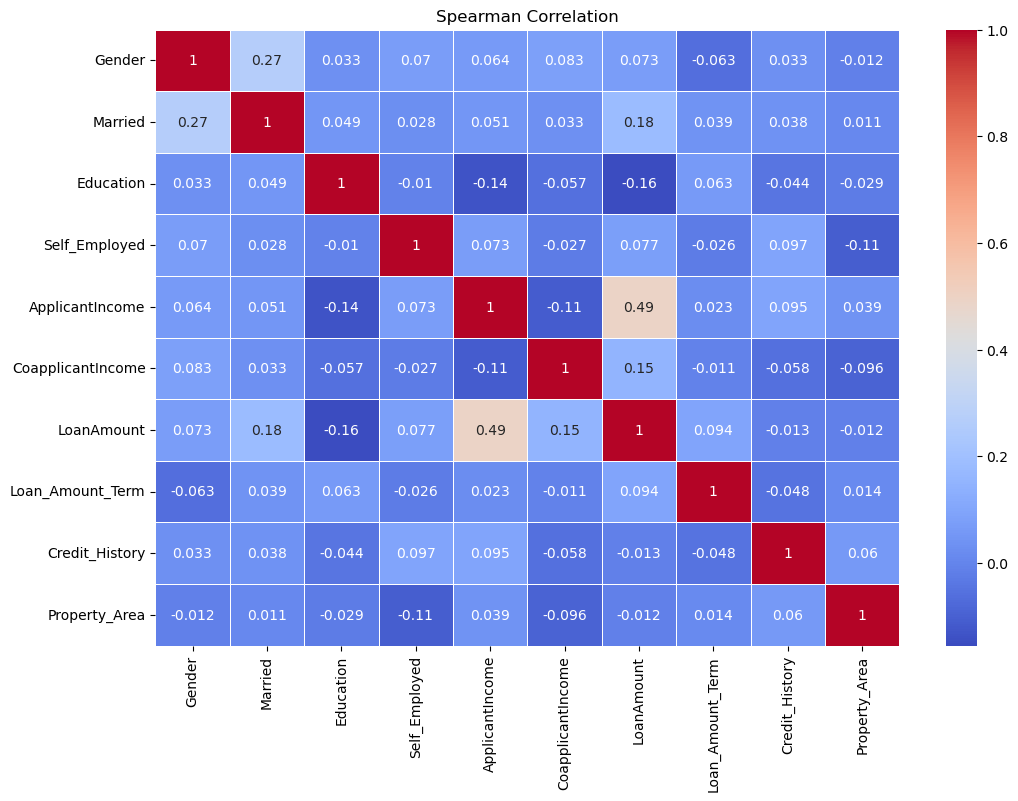

In [135]:
#heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Spearman Correlation")
plt.show()

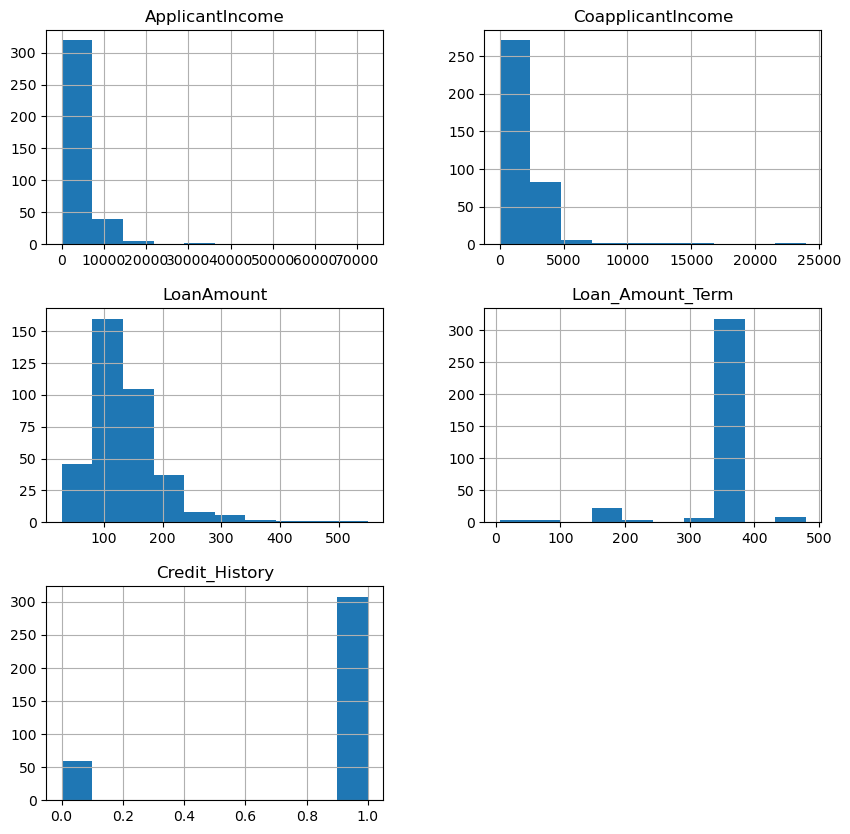

In [102]:
#plot of histogram
data.hist(bins=10,figsize=(10,10))
plt.show()

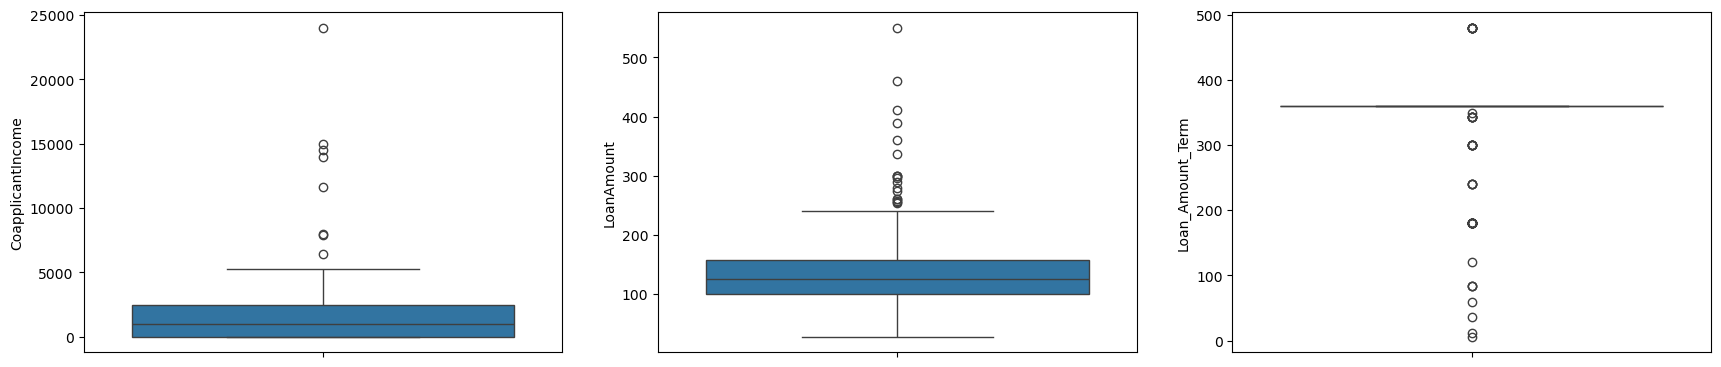

In [129]:
#checking outliers using box plot 

fig=plt.figure(figsize=(21,15))
plt.subplot(3,3,1)
sns.boxplot(data['CoapplicantIncome'])
plt.subplot(3,3,2)
sns.boxplot(data['LoanAmount'])
plt.subplot(3,3,3)
sns.boxplot(data['Loan_Amount_Term'])

plt.show()

In [ ]:
#basic plots

plt.subplots(figsize=(10,6))
data['Gender'].value_counts().plot.bar(color='green')
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.subplots(figsize=(10,6))
data['Gender'].value_counts().plot.bar(color='green')
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.subplots(figsize=(10,6))
data['Married'].value_counts().plot.bar(color='red')
plt.title('Married')
plt.xlabel('Married')
plt.ylabel('Married')
plt.show()

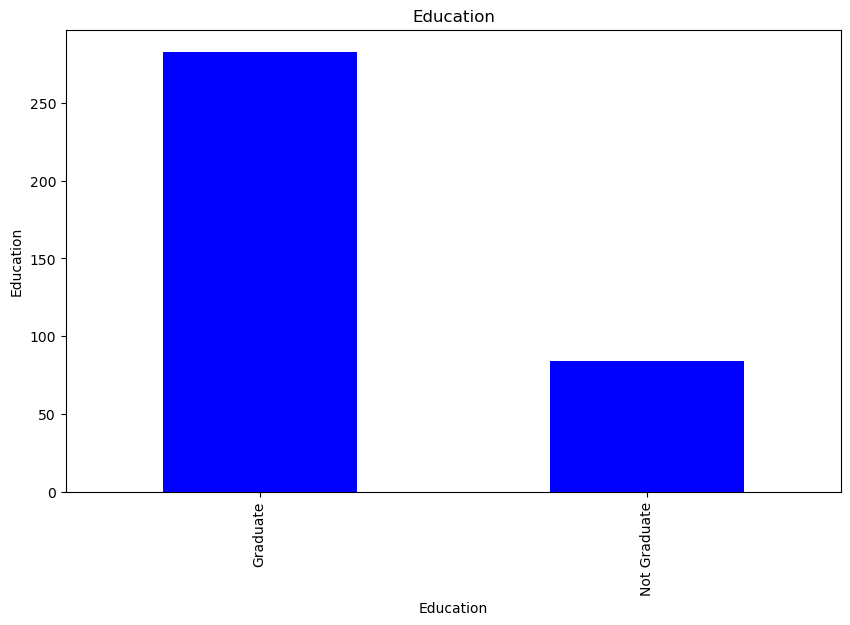

In [109]:
plt.subplots(figsize=(10,6))
data['Education'].value_counts().plot.bar(color='blue')
plt.title('Education')
plt.xlabel('Education')
plt.ylabel('Education')
plt.show()

In [111]:
data['Property_Area'].value_counts()

Property_Area
Urban        140
Semiurban    116
Rural        111
Name: count, dtype: int64

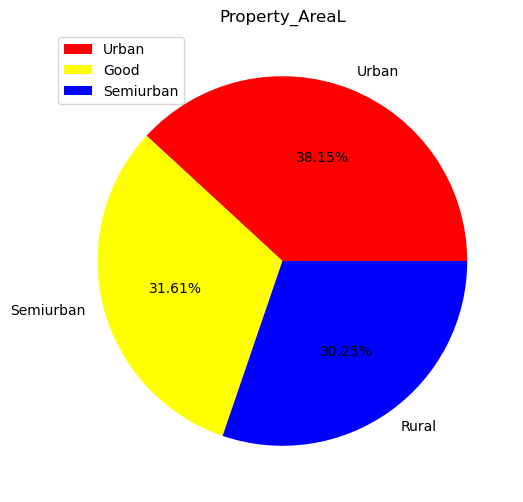

In [113]:
plt.subplots(figsize=(8,6))
plt.pie(data['Property_Area'].value_counts().values, labels = data['Property_Area'].value_counts().index, colors = ['red','yellow','blue'],autopct = "%.2f%%")
plt.title('Property_AreaL')
plt.legend(['Urban','Good','Semiurban','Very poor','Rural'])
plt.show()


In [115]:
#encoding categorical variables

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Married'] = le.fit_transform(data['Married'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
data['Education'] = le.fit_transform(data['Education'])
data['Property_Area'] = le.fit_transform(data['Property_Area'])

In [117]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3+,1,1,4009,1777,113.0,360.0,1.0,2
363,LP002975,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,LP002980,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,LP002986,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0
